In [1]:
##argopy Task 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import argopy

In [3]:
from argopy import DataFetcher as ArgoDataFetcher
argo_loader = ArgoDataFetcher()
argo_loader

<datafetcher> 'Not initialised'
Current backend: erddap
Available fetchers: profile, float, region
User mode: standard

In [4]:
##Load data from a specific argo float - float number chosen using argopy.dashboard()

ds = argo_loader.float(6902754).to_xarray() 
print(ds)

<xarray.Dataset>
Dimensions:                (N_POINTS: 14211)
Coordinates:
  * N_POINTS               (N_POINTS) int64 0 1 2 3 ... 14207 14208 14209 14210
    LATITUDE               (N_POINTS) float64 58.98 58.98 58.98 ... 49.18 49.18
    LONGITUDE              (N_POINTS) float64 -32.05 -32.05 ... -47.99 -47.99
    TIME                   (N_POINTS) datetime64[ns] 2017-11-16T03:55:00 ... ...
Data variables: (12/13)
    CONFIG_MISSION_NUMBER  (N_POINTS) int64 1 1 1 1 1 1 1 1 ... 2 2 2 2 2 2 2 2
    CYCLE_NUMBER           (N_POINTS) int64 1 1 1 1 1 1 ... 131 131 131 131 131
    DATA_MODE              (N_POINTS) <U1 'D' 'D' 'D' 'D' ... 'A' 'A' 'A' 'A'
    DIRECTION              (N_POINTS) <U1 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A'
    PLATFORM_NUMBER        (N_POINTS) int64 6902754 6902754 ... 6902754 6902754
    POSITION_QC            (N_POINTS) int64 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
    ...                     ...
    PRES_QC                (N_POINTS) int64 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 

In [5]:
df = ds.to_dataframe() ##Covert data to a pandas dataframe

In [7]:
df.to_csv (r'argopy_task2.csv', index = False, header=True)  ##Export data to a csv file

In [8]:
df = pd.read_csv('argopy_task2.csv', parse_dates=[15]) ##Load in csv file and identify date columns

In [9]:
df

,CONFIG_MISSION_NUMBER,CYCLE_NUMBER,DATA_MODE,DIRECTION,PLATFORM_NUMBER,POSITION_QC,PRES,PRES_QC,PSAL,PSAL_QC,TEMP,TEMP_QC,TIME_QC,LATITUDE,LONGITUDE,TIME
0,1,1,D,A,6902754,1,5.0,1,34.688,1,6.768,1,1,58.983,-32.052,2017-11-16 03:55:00
1,1,1,D,A,6902754,1,8.0,1,34.688,1,6.776,1,1,58.983,-32.052,2017-11-16 03:55:00
2,1,1,D,A,6902754,1,10.0,1,34.688,1,6.775,1,1,58.983,-32.052,2017-11-16 03:55:00
3,1,1,D,A,6902754,1,16.0,1,34.688,1,6.774,1,1,58.983,-32.052,2017-11-16 03:55:00
4,1,1,D,A,6902754,1,26.0,1,34.688,1,6.775,1,1,58.983,-32.052,2017-11-16 03:55:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14206,2,131,A,A,6902754,1,1913.0,1,34.916,1,2.852,1,1,49.181,-47.986,2021-06-08 00:51:00
14207,2,131,A,A,6902754,1,1938.0,1,34.916,1,2.831,1,1,49.181,-47.986,2021-06-08 00:51:00
14208,2,131,A,A,6902754,1,1963.0,1,34.916,1,2.813,1,1,49.181,-47.986,2021-06-08 00:51:00
14209,2,131,A,A,6902754,1,1989.0,1,34.915,1,2.803,1,1,49.181,-47.986,2021-06-08 00:51:00


In [10]:
import geopandas as gpd

In [11]:
##Dataframe from geopandas used to plot countries and continents

countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
countries

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


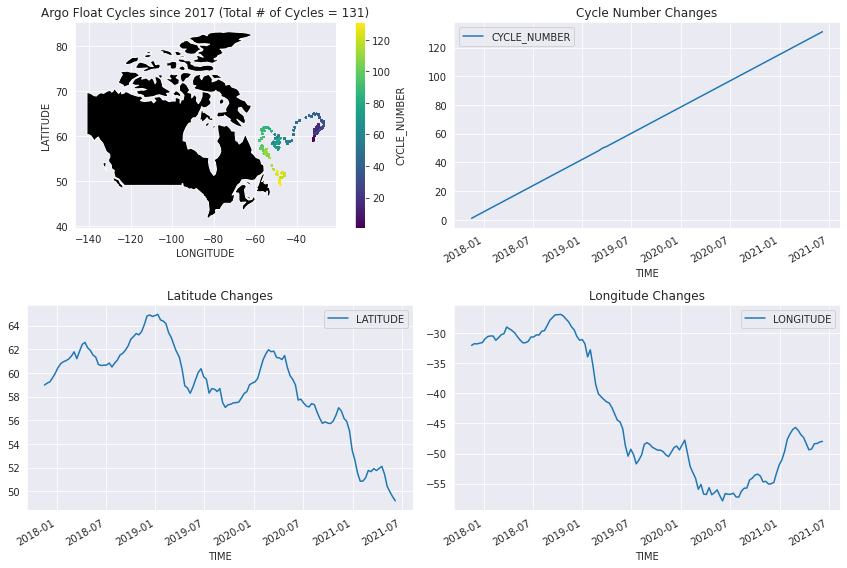

In [31]:
# Start the plot - plot the trajectory of argo float cycles and variation in temperature, salinity and pressure
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12,8))

# Plot Canada on the map in [0,0]

countries[countries["name"] == "Canada"].plot(ax=ax[0,0],color="black")

# Make four plots with different position data sets recorded since 2017

df.plot(ax=ax[0,0], x="LONGITUDE", y="LATITUDE", kind="scatter", c="CYCLE_NUMBER", colormap="viridis", s=1)
ax[0, 0].set_title("Argo Float Cycles since 2017 (Total # of Cycles = 131)")
df.plot(ax=ax[1,0], x="TIME", y="LATITUDE")
ax[1, 0].set_title("Latitude Changes")

df.plot(ax=ax[0,1], x="TIME", y="CYCLE_NUMBER")
ax[0, 1].set_title("Cycle Number Changes")

df.plot(ax=ax[1,1], x="TIME", y="LONGITUDE")
ax[1, 1].set_title("Longitude Changes")


# Add grids and plot layout
ax[0, 0].grid()
ax[1, 0].grid()
ax[1, 1].grid()
ax[0, 1].grid()

fig.tight_layout()
plt.show()